In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [ ]:
df = pd.read_csv("/content/Capstone_Project_Dataset.csv",index_col="ID")
df.head()

,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
ID,,,,,,,,,,,
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df.shape

(18368, 11)

In [ ]:
# Basic data types info
print("\nData Types:")
print(df.dtypes)


Data Types:
SystemCodeNumber           object
Capacity                    int64
Latitude                  float64
Longitude                 float64
Occupancy                   int64
VehicleType                object
TrafficConditionNearby     object
QueueLength                 int64
IsSpecialDay                int64
LastUpdatedDate            object
LastUpdatedTime            object
dtype: object


In [ ]:
# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
SystemCodeNumber          0
Capacity                  0
Latitude                  0
Longitude                 0
Occupancy                 0
VehicleType               0
TrafficConditionNearby    0
QueueLength               0
IsSpecialDay              0
LastUpdatedDate           0
LastUpdatedTime           0
dtype: int64


In [ ]:
# Number of parking lots present:
df['SystemCodeNumber'].nunique()

14

In [ ]:
# Unique Parkings lots present:
df['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

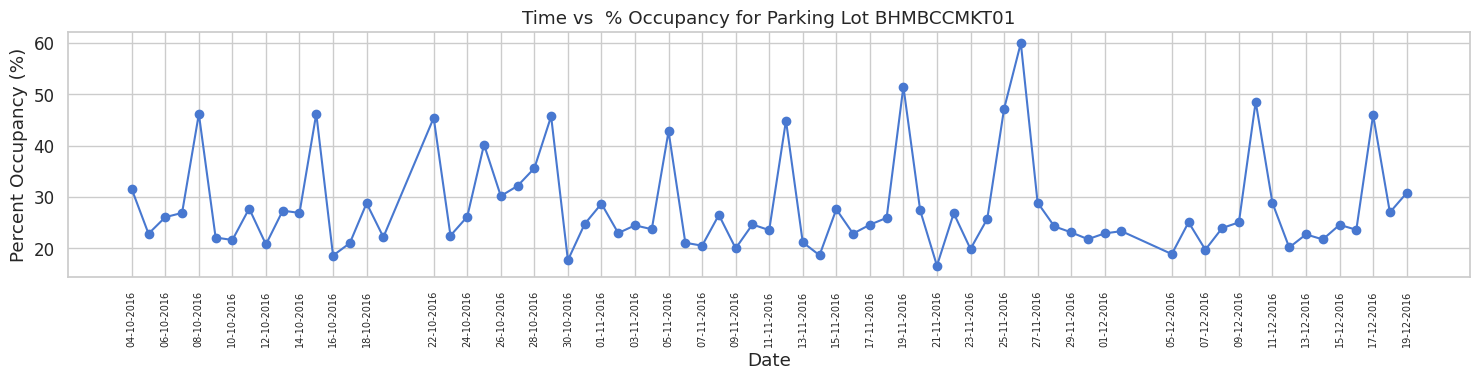

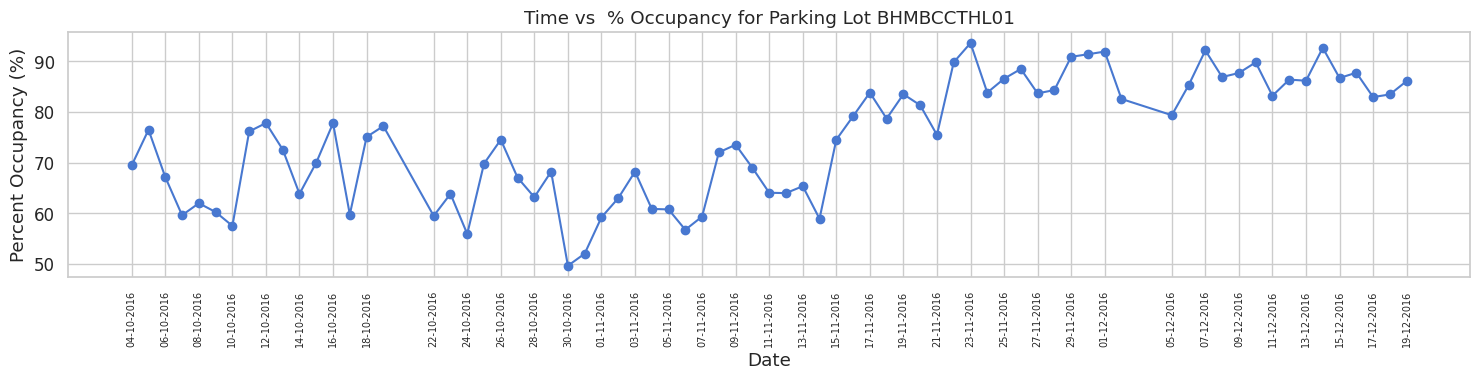

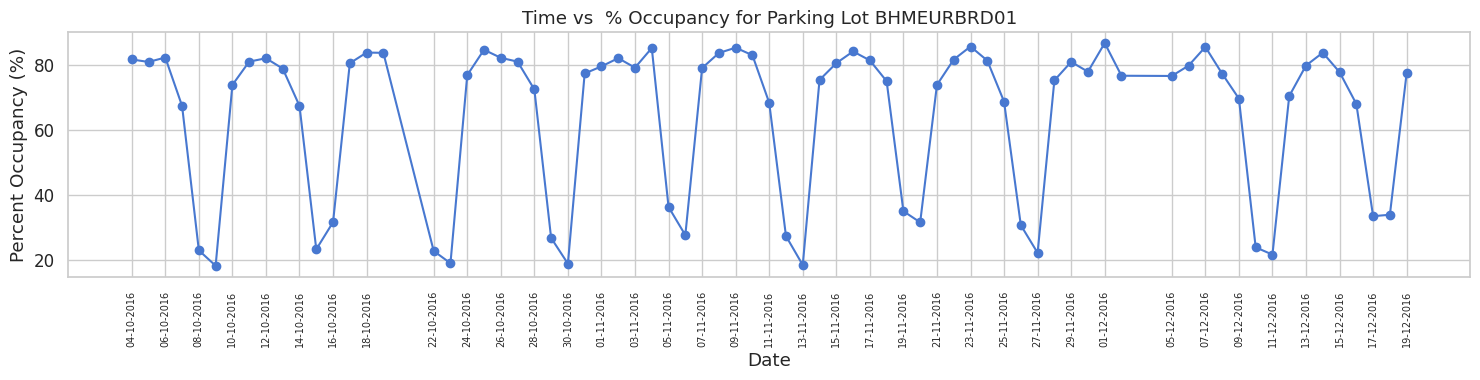

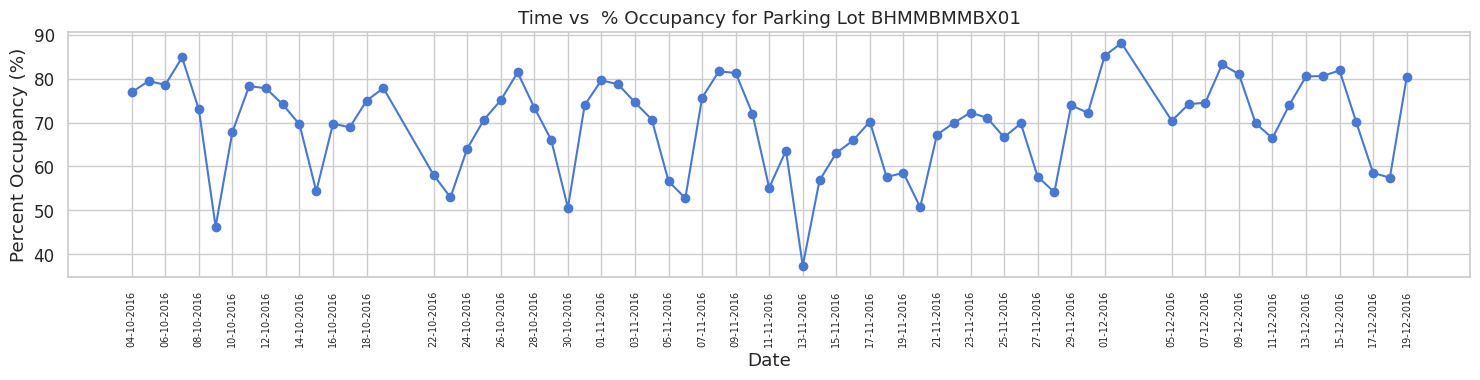

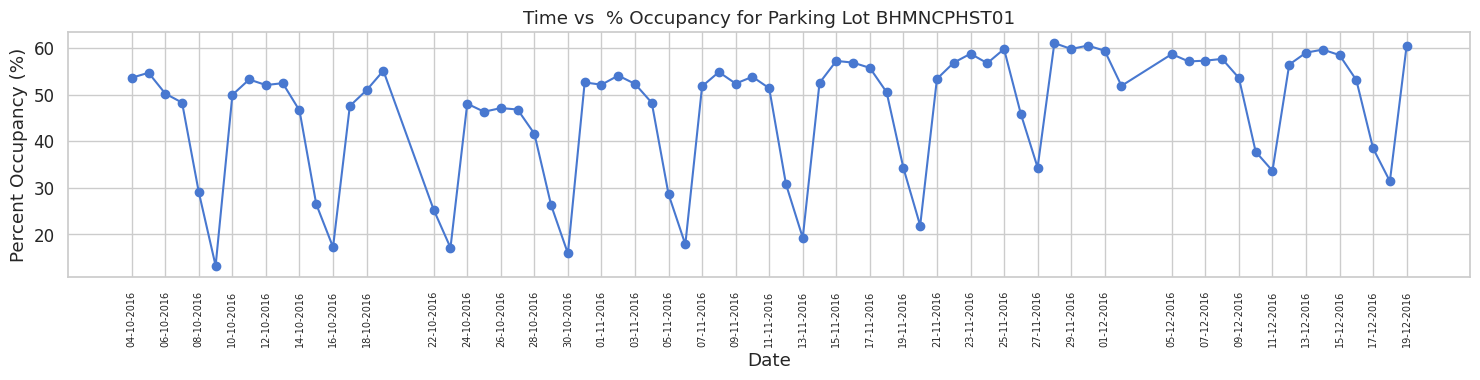

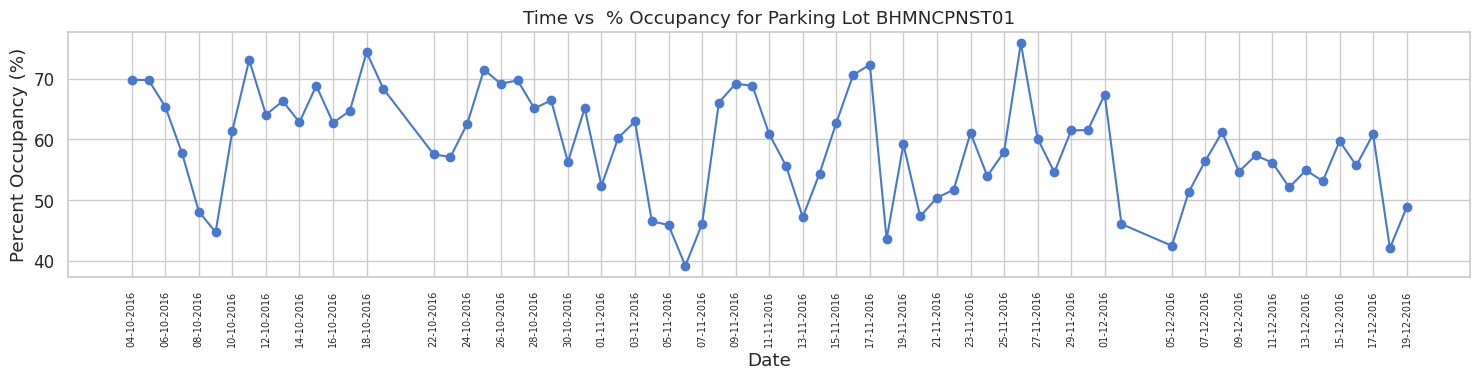

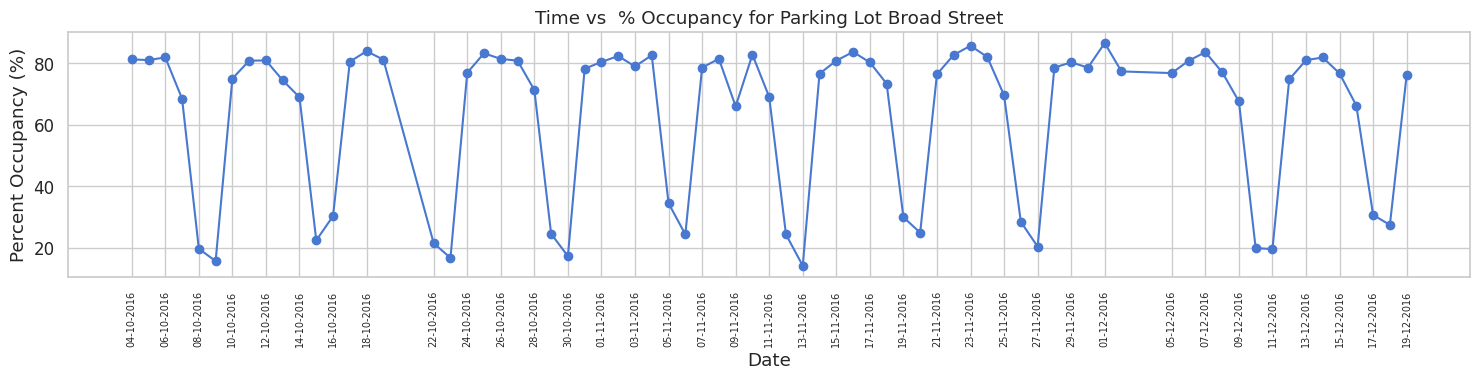

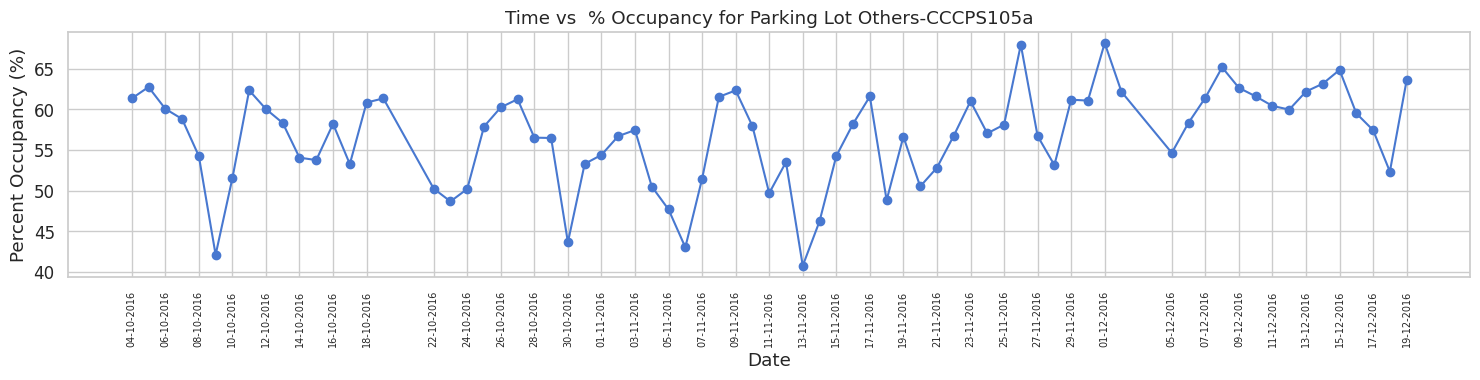

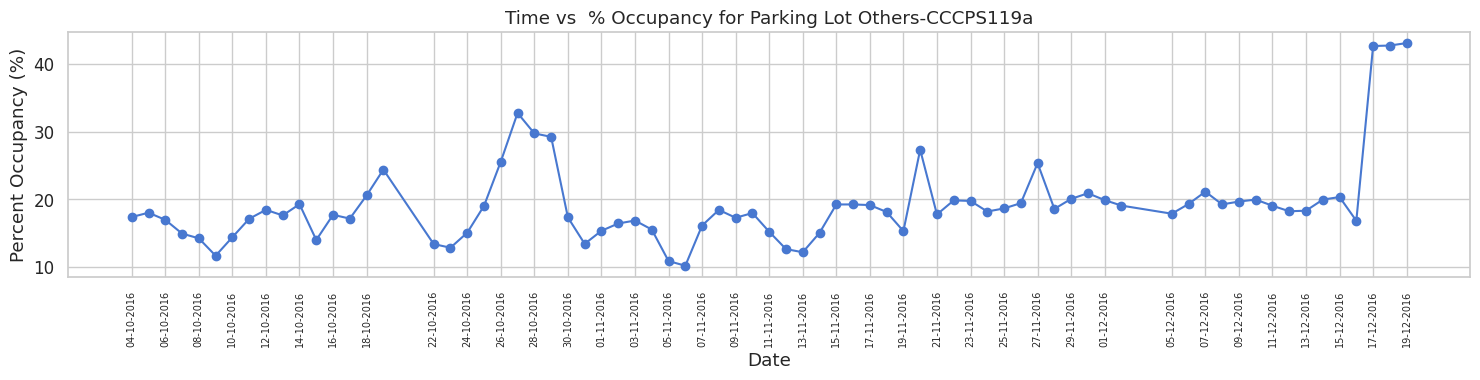

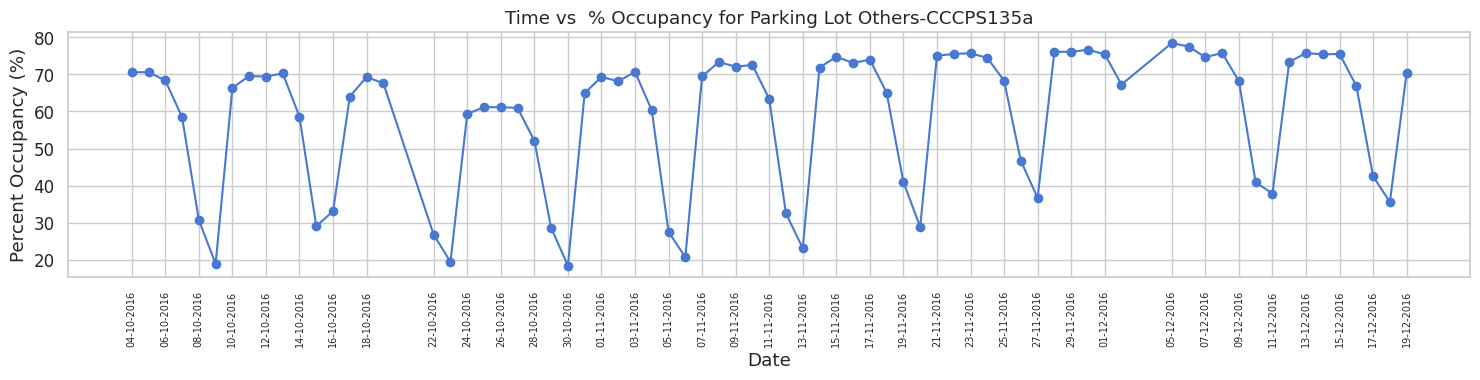

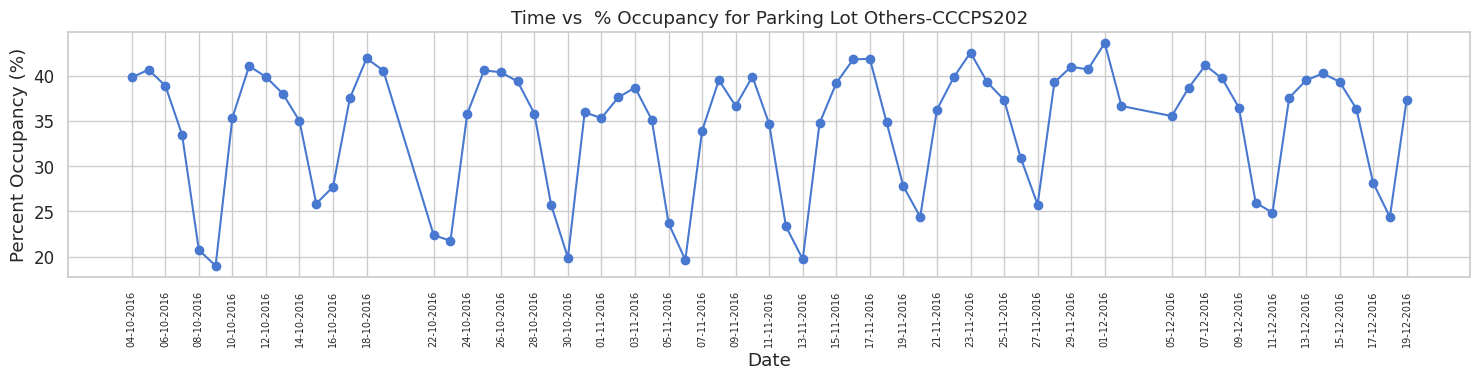

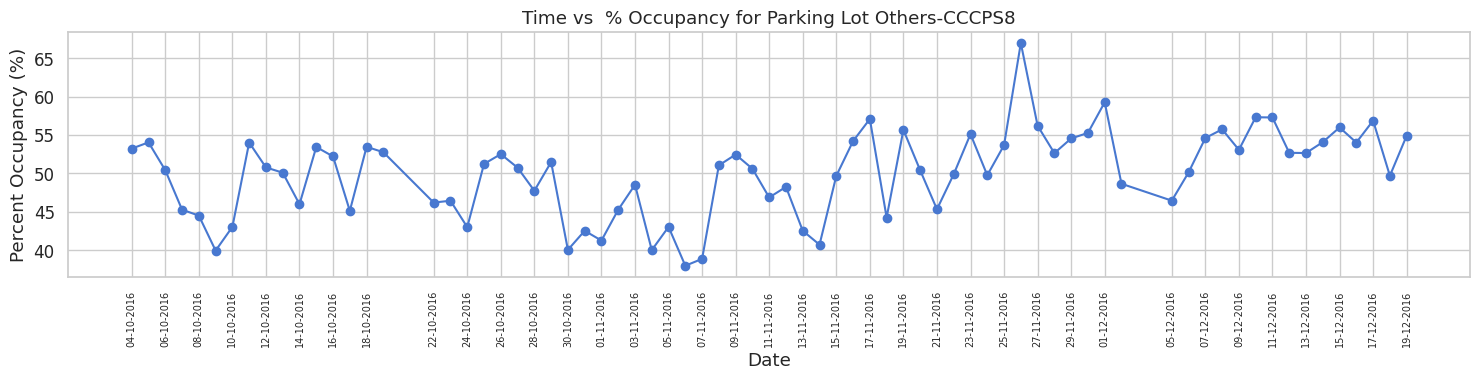

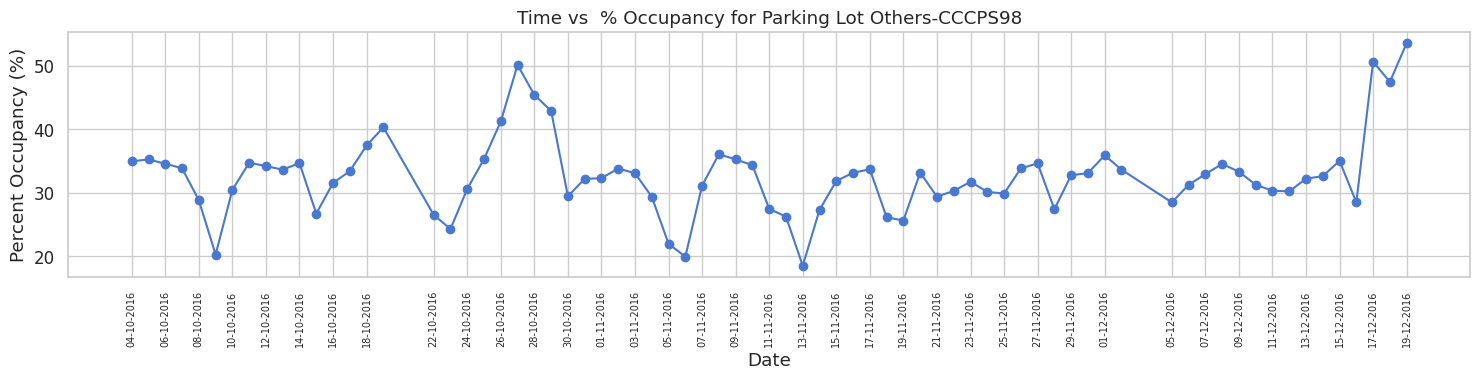

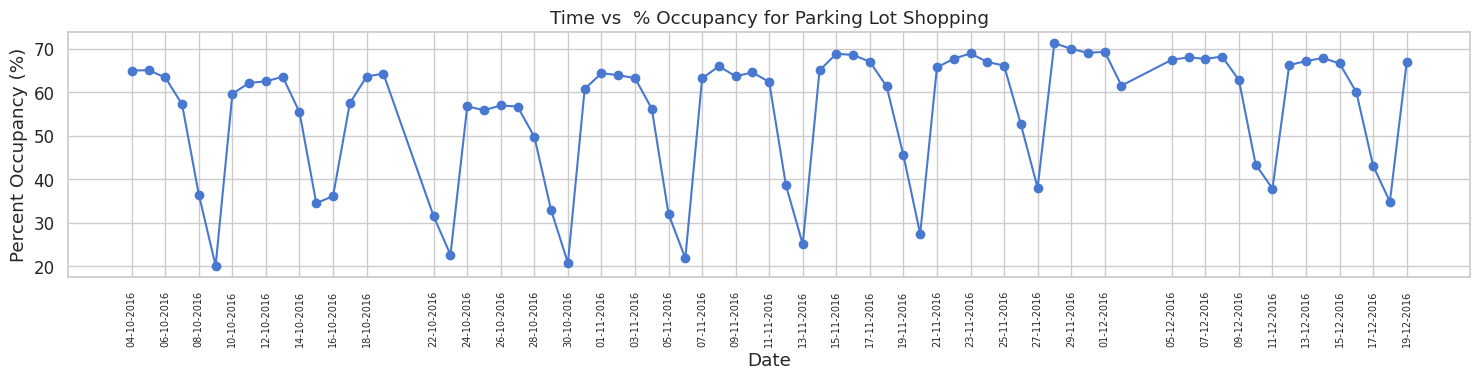

In [ ]:
# Average Occupancy of a parking lot with different dates:
df['PercentOccupancy'] = (df['Occupancy'] / df['Capacity']) * 100

df['LastUpdatedDate'] = pd.to_datetime(df['LastUpdatedDate'], format='%d-%m-%Y')

# Calculate day-wise average
grouped_df1 = df.groupby(['SystemCodeNumber', 'LastUpdatedDate'])['PercentOccupancy'].mean().reset_index()

# Get list of parking lots
parking_lots = grouped_df1['SystemCodeNumber'].unique()

# Plot each lot separately
for lot_id in parking_lots:
    lot_data = grouped_df1[grouped_df1['SystemCodeNumber'] == lot_id]
    lot_data = lot_data.sort_values('LastUpdatedDate')

    plt.figure(figsize=(15, 4))
    plt.plot(lot_data['LastUpdatedDate'], lot_data['PercentOccupancy'], marker='o', linestyle='-')
    plt.title(f'Time vs  % Occupancy for Parking Lot {lot_id}')
    plt.xlabel('Date')
    plt.ylabel('Percent Occupancy (%)')

    # Show every 2nd date only
    every_n = 2
    ticks = lot_data['LastUpdatedDate'][::every_n]
    labels = lot_data['LastUpdatedDate'].dt.strftime('%d-%m-%Y')[::every_n]
    plt.xticks(ticks=ticks, labels=labels, rotation=90, fontsize=7)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Which days are holidays:
holidays_df = df[df['IsSpecialDay'] ==1]
df_unique = holidays_df.drop_duplicates(subset=['LastUpdatedDate'])
df_unique['LastUpdatedDate']

,LastUpdatedDate
ID,
90,2016-10-09
216,2016-10-16
306,2016-10-23
432,2016-10-30
558,2016-11-06
684,2016-11-13
810,2016-11-20
936,2016-11-27
1044,2016-12-05


In [ ]:
# Average rush on special occasions and on normal occasions
grouped_df1 = df.groupby(['IsSpecialDay'])['Occupancy'].mean().reset_index()
grouped_df1

,IsSpecialDay,Occupancy
0,0,768.487882
1,1,520.640332


In [ ]:
df.head()

,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,PercentOccupancy
ID,,,,,,,,,,,,
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04,07:59:00,10.571924
1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,2016-10-04,08:25:00,11.091854
2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,2016-10-04,08:59:00,13.864818
3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,2016-10-04,09:32:00,18.544194
4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,2016-10-04,09:59:00,25.996534


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SystemCodeNumber        18368 non-null  object        
 1   Capacity                18368 non-null  int64         
 2   Latitude                18368 non-null  float64       
 3   Longitude               18368 non-null  float64       
 4   Occupancy               18368 non-null  int64         
 5   VehicleType             18368 non-null  object        
 6   TrafficConditionNearby  18368 non-null  object        
 7   QueueLength             18368 non-null  int64         
 8   IsSpecialDay            18368 non-null  int64         
 9   LastUpdatedDate         18368 non-null  datetime64[ns]
 10  LastUpdatedTime         18368 non-null  object        
 11  PercentOccupancy        18368 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(

/tmp/ipython-input-247-672681034.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastUpdatedTime'] = pd.to_datetime(df['LastUpdatedTime'])


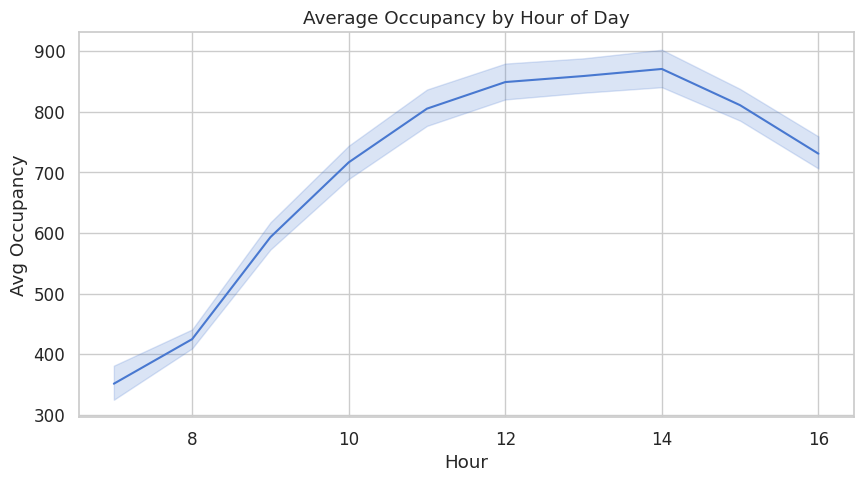

In [ ]:
df['LastUpdatedTime'] = pd.to_datetime(df['LastUpdatedTime'])


# Extract hour and day
df['hour'] = df['LastUpdatedTime'].apply(lambda x: x.hour)

# Average occupancy by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='hour', y='Occupancy', estimator='mean')
plt.title('Average Occupancy by Hour of Day')
plt.ylabel('Avg Occupancy')
plt.xlabel('Hour')
plt.grid(True)
plt.show()

In [ ]:
df['LastUpdatedTime'] = df['LastUpdatedTime'].dt.time
df.head()

,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,hour
ID,,,,,,,,,,,,
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,7
1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,8
2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,8
3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,9
4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,9


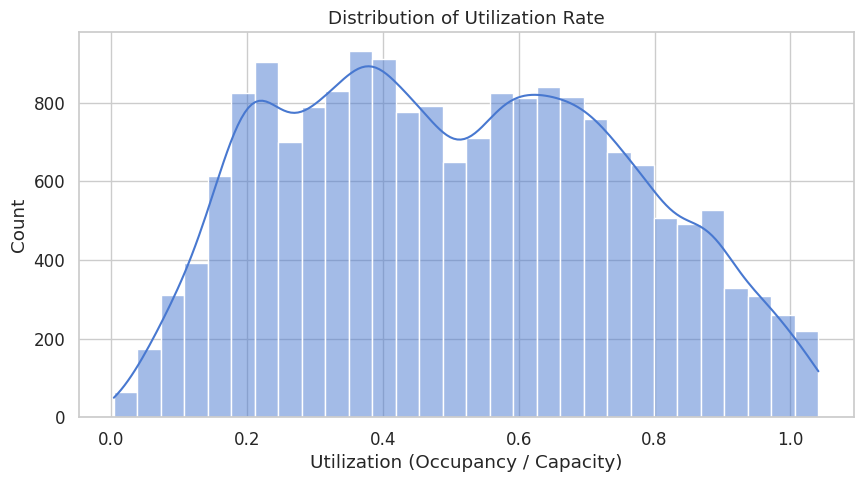

In [ ]:
# Utilization Rate
df['utilization'] = df['Occupancy'] / df['Capacity']

plt.figure(figsize=(10, 5))
sns.histplot(df['utilization'], bins=30, kde=True)
plt.title('Distribution of Utilization Rate')
plt.xlabel('Utilization (Occupancy / Capacity)')
plt.show()


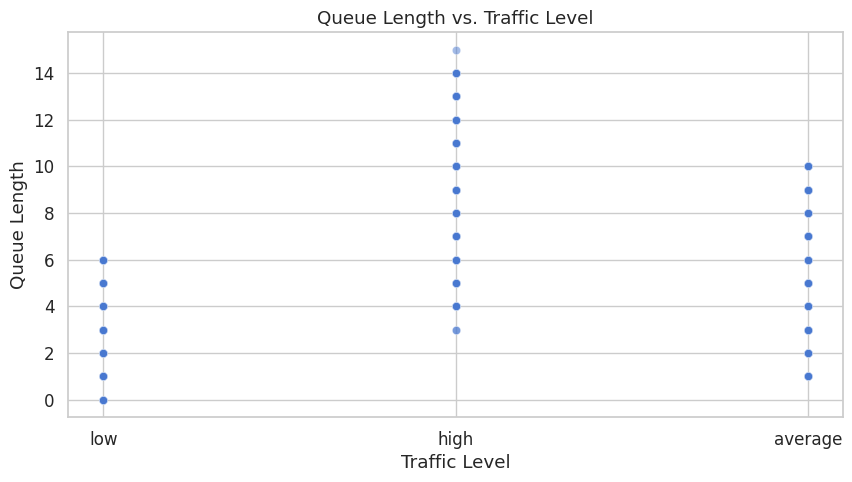

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='TrafficConditionNearby', y='QueueLength', alpha=0.5)
plt.title('Queue Length vs. Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Queue Length')
plt.show()


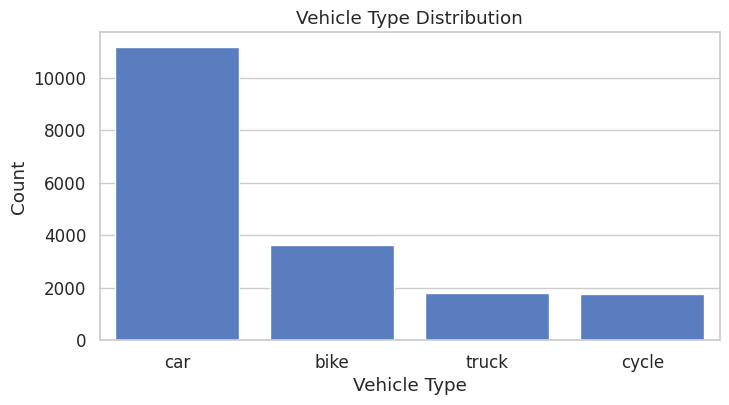

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='VehicleType', order=df['VehicleType'].value_counts().index)
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


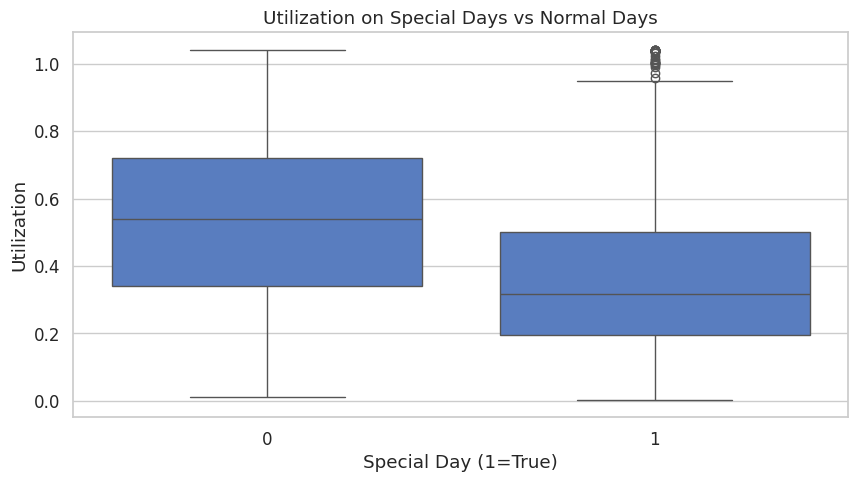

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='IsSpecialDay', y='utilization')
plt.title('Utilization on Special Days vs Normal Days')
plt.xlabel('Special Day (1=True)')
plt.ylabel('Utilization')
plt.show()


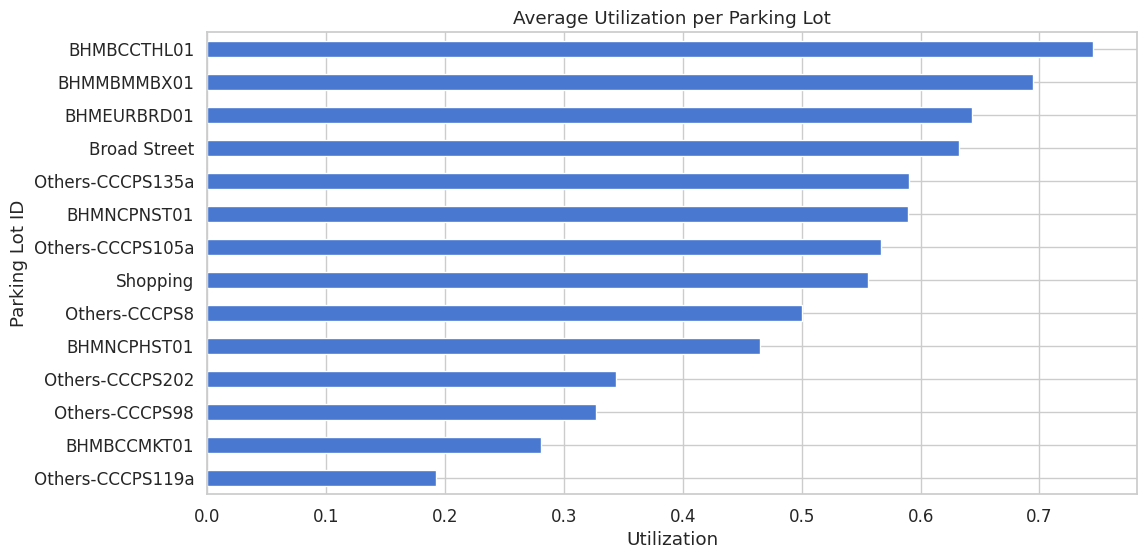

In [ ]:
# Assuming you have lot_id or location_id column
avg_util_per_lot = df.groupby('SystemCodeNumber')['utilization'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_util_per_lot.plot(kind='barh')
plt.title('Average Utilization per Parking Lot')
plt.xlabel('Utilization')
plt.ylabel('Parking Lot ID')
plt.grid(True)
plt.show()


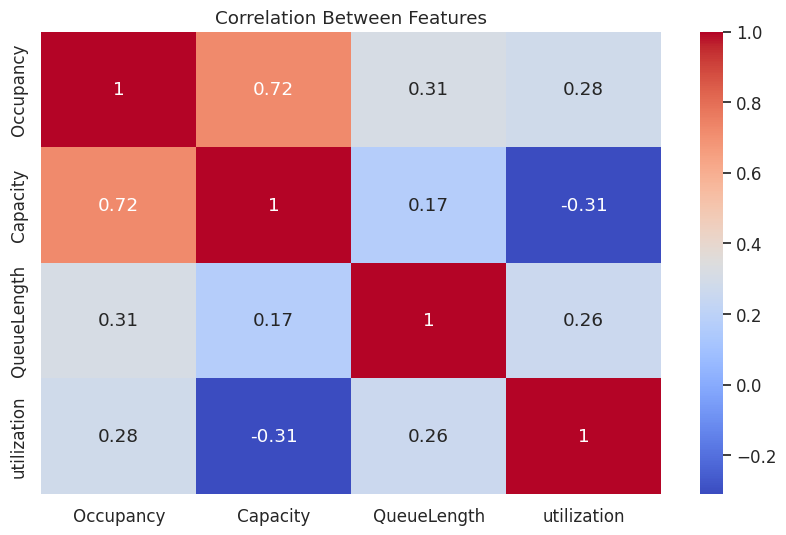

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Occupancy', 'Capacity', 'QueueLength', 'utilization']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


In [ ]:
df.head()

,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,hour,price
ID,,,,,,,,,,,,,
972,BHMBCCMKT01,577,26.144536,91.736172,20,truck,average,1,0,29-11-2016,07:55:00,7,10.069324
1026,BHMBCCMKT01,577,26.144536,91.736172,18,bike,low,1,0,02-12-2016,07:55:00,7,10.131716
324,BHMBCCMKT01,577,26.144536,91.736172,47,car,low,1,0,24-10-2016,07:56:00,7,10.294627
486,BHMBCCMKT01,577,26.144536,91.736172,50,bike,low,1,0,02-11-2016,07:56:00,7,10.467938
1062,BHMBCCMKT01,577,26.144536,91.736172,11,car,low,1,0,06-12-2016,07:56:00,7,10.506066


In [ ]:
# Model 1 implimentation:
# Initialize base price
base_price = 10.0
alpha = 2.0

# Create a column for price
df['model1_price'] = np.nan

# Group by lot and simulate pricing over time
for lot_id, group in df.groupby('SystemCodeNumber'):
    prices = []

    for _, row in group.iterrows():
        utilization = row['Occupancy'] / row['Capacity']
        price = base_price + alpha * utilization
        price = max(5,price)
        prices.append(price)

    df.loc[group.index, 'model1_price'] = prices

# Show result
print(df[['LastUpdatedDate','LastUpdatedTime', 'QueueLength', 'SystemCodeNumber', 'Occupancy' ,'model1_price']].head(20))


     LastUpdatedDate LastUpdatedTime  QueueLength SystemCodeNumber  Occupancy  \
ID                                                                              
972       29-11-2016        07:55:00            1      BHMBCCMKT01         20   
508       03-11-2016        10:00:00            3      BHMBCCMKT01        119   
1199      13-12-2016        13:55:00            5      BHMBCCMKT01        210   
264       18-10-2016        13:54:00            6      BHMBCCMKT01        226   
785       18-11-2016        13:34:00            7      BHMBCCMKT01        217   
659       11-11-2016        13:34:00            6      BHMBCCMKT01        166   
641       10-11-2016        13:34:00            7      BHMBCCMKT01        200   
605       08-11-2016        13:34:00            7      BHMBCCMKT01        237   
354       25-10-2016        13:56:00            5      BHMBCCMKT01        363   
209       15-10-2016        13:34:00            8      BHMBCCMKT01        352   
695       13-11-2016        

In [ ]:
# Model 2 Implimentation:
# Step 1: Replace mapping carefully
vehicle_type_map = {'car': 1.0, 'bike': 0.5, 'truck': 1.5}
df['vehicle_weight'] = df['VehicleType'].map(vehicle_type_map)

traffic_map = {'low': 1, 'average': 2, 'high': 3}
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].map(traffic_map)

# Step 2: Handle missing or zero capacity
df = df[df['Capacity'] > 0]  # filter out invalid rows

# Step 3: Compute utilization
df['Utilization'] = df['Occupancy'] / df['Capacity']

# Step 4: Fill missing special day and queue length if any
df['QueueLength'] = df['QueueLength'].fillna(0)
df['IsSpecialDay'] = df['IsSpecialDay'].fillna(0)
df['vehicle_weight'] = df['vehicle_weight'].fillna(1.0)  # assume car
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].fillna(2)  # assume average

# Step 5: Compute demand
alpha = 1.0
beta = 0.5
gamma = 0.3
delta = 1.0
epsilon = 1.0
lmbda = 0.8

df['raw_demand'] = (
    alpha * df['Utilization'] +
    beta * df['QueueLength'] -
    gamma * df['TrafficConditionNearby'] +
    delta * df['IsSpecialDay'] +
    epsilon * df['vehicle_weight']
)

# Step 6: Normalize demand
dmin = df['raw_demand'].min()
dmax = df['raw_demand'].max()

if dmin != dmax:
    df['normalized_demand'] = (df['raw_demand'] - dmin) / (dmax - dmin)
else:
    df['normalized_demand'] = 0  # or 1 — any constant

# Step 7: Calculate price
base_price = 10
df['Model2_price'] = base_price * (1 + lmbda * df['normalized_demand'])

# Final check
print(df[['SystemCodeNumber', 'Utilization', 'normalized_demand', 'model1_price' , 'Model2_price']].head(10))


     SystemCodeNumber  Utilization  normalized_demand  model1_price  \
ID                                                                    
972       BHMBCCMKT01     0.034662           0.153557     10.069324   
508       BHMBCCMKT01     0.206239           0.221600     10.412478   
1199      BHMBCCMKT01     0.363951           0.389555     10.727903   
264       BHMBCCMKT01     0.391681           0.341706     10.783362   
785       BHMBCCMKT01     0.376083           0.492102     10.752166   
659       BHMBCCMKT01     0.287695           0.381829     10.575390   
641       BHMBCCMKT01     0.346620           0.438458     10.693241   
605       BHMBCCMKT01     0.410745           0.394296     10.821490   
354       BHMBCCMKT01     0.629116           0.416421     11.258232   
209       BHMBCCMKT01     0.610052           0.515807     11.220104   

      Model2_price  
ID                  
972      11.228456  
508      11.772797  
1199     13.116443  
264      12.733648  
785      13.936818  


In [ ]:
# Model 3 Implimentation: